#PROVA 16-01-2018: Bank Marketing
Il datataset BankMarketingDataSey.csv (formato csv con separatore “;”) contiene dati di
campagne di marketing attivate da una banca portoghese. Scopo dell’esercizio è predire se il
cliente sottoscriverà un deposito (variabile y). Questi sono i campi del dataset (estratti da UCI
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

- 0 - id (numeric)
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.', 'blue- collar', 'entrepreneur', 'housemaid',
'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed',
'unknown')
- 3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced'
means divorced or widowed)
- 4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y',' high.school', 'illiterate',
'professional.course', 'university.degree', 'unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
- 8 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 9 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 10 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 11 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 12 - nr.employed: number of employees - quarterly indicator (numeric)

#Parte 1: Analisi


###Punto 1. Caricare il dataset e denominarlo con una variabile chiamata “dataset”

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/BankMarketingDataSet.csv',sep=';')

###Punto 2 


###Quante sono le istanze contenute nel dataset?

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   emp.var.rate    4119 non-null   float64
 9   cons.price.idx  4119 non-null   float64
 10  cons.conf.idx   4119 non-null   float64
 11  euribor3m       4119 non-null   float64
 12  nr.employed     4119 non-null   float64
 13  y               4119 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 450.6+ KB


Il dataset contiene 4119 istanze, 13 features ed una classe da predire (la colonna y)

###Il dataset è completo (cioè per ogniistanza tutti i valori di attributo sono sempre specificati – non esistono “missing values”)?

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   emp.var.rate    4119 non-null   float64
 9   cons.price.idx  4119 non-null   float64
 10  cons.conf.idx   4119 non-null   float64
 11  euribor3m       4119 non-null   float64
 12  nr.employed     4119 non-null   float64
 13  y               4119 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 450.6+ KB


In [ ]:
dataset[dataset.isna().any(axis=1)]

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


Non esistono valori NaN nel datset, per cui esso è completo

###Il dataset è bilanciato per quanto riguarda la classe da predire?

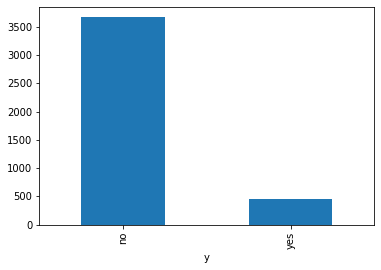

In [ ]:
dataset.groupby('y').size().plot.bar()

Il dataset è sbilanciato, con la maggioranza delle entry del dataset avente valore 'no'

###Punto 3) Visualizzare la distribuzione delle età in uno specifico diagramma (punti 2)

Età media:  40 anni


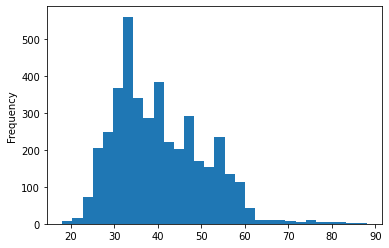

In [ ]:
dataset['age'].plot.hist(bins=30)
print('Età media: ', round(dataset['age'].mean()), 'anni')

###4. Attraverso l’analisi del dataset è possibile ipotizzare se l’attributo “marital status” influisce nella predizione? In che modo influisce? Giustificare la risposta. (punti 3)

In [ ]:
(dataset.groupby(['marital','y']).size()/dataset.groupby(['marital']).size()).unstack()

y,no,yes
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


In [ ]:
(dataset.groupby(['marital','y']).size()/dataset.groupby(['y']).size()).unstack()

y,no,yes
marital,,
divorced,0.109869,0.095344
married,0.615322,0.558758
single,0.272083,0.343681
unknown,0.002726,0.002217


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe702b21588>,
      dtype=object)

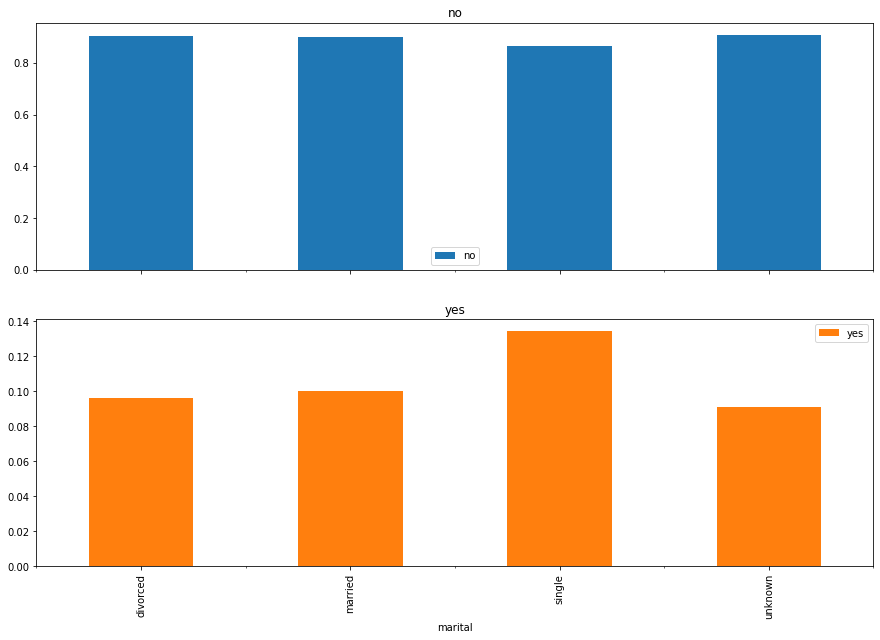

In [ ]:
(dataset.groupby(['marital','y']).size()/dataset.groupby(['marital']).size()).unstack().plot(subplots=True,kind='bar',figsize=(15,10))

Il grafico mostra la classe associata alle varie istanze possibili per la features 'marital'.
Si è normalizzato per il numero di istanze aventi i vari valori (divorziati, sposati, single, stato sconosiuto)
Non si notano grandi differenze tra le classi, eccetto per i single, i quali hanno circa il 4% in più di classi "yes"

###5)Calcolare una serie che rappresenti per ogni età la percentuale delle persone che hanno sottoscritto un deposito. Calcolare poi una serie che rappresenti per ogni età la percentuale delle persone che non hanno sottoscritto un deposito. Rappresentare graficamente le due serie (anche in diagrammi distinti e effettuare considerazioni sul risultato ottenuto – se ne nascono) (punti 4)

In [ ]:
y_by_age = (dataset.groupby(['age','y']).size()/dataset.groupby(['age']).size())
y_by_age = y_by_age.unstack()

In [ ]:
y_by_age

y,no,yes
age,,
18,0.666667,0.333333
19,1.000000,NaN
20,1.000000,NaN
21,0.571429,0.428571
22,0.800000,0.200000
...,...,...
81,0.333333,0.666667
82,NaN,1.000000
85,1.000000,NaN


In [ ]:
y_by_age.fillna(value=0, inplace=True)
y_by_age  = y_by_age * 100
y_by_age

y,no,yes
age,,
18,66.666667,33.333333
19,100.000000,0.000000
20,100.000000,0.000000
21,57.142857,42.857143
22,80.000000,20.000000
...,...,...
81,33.333333,66.666667
82,0.000000,100.000000
85,100.000000,0.000000


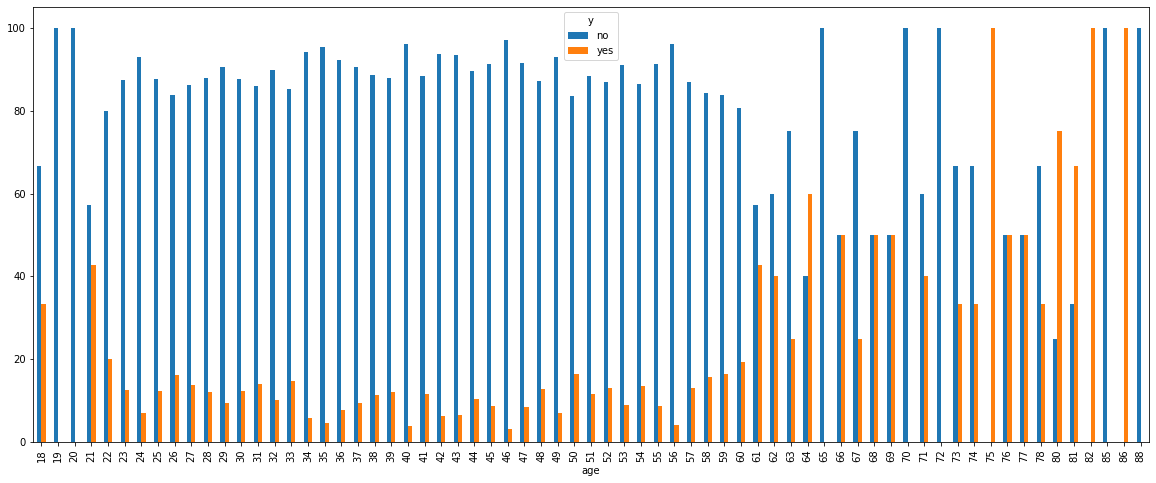

In [ ]:
y_by_age.plot(kind='bar', figsize=(20,8))

In [ ]:
yes_by_age = y_by_age['yes']
no_by_age = y_by_age['no']

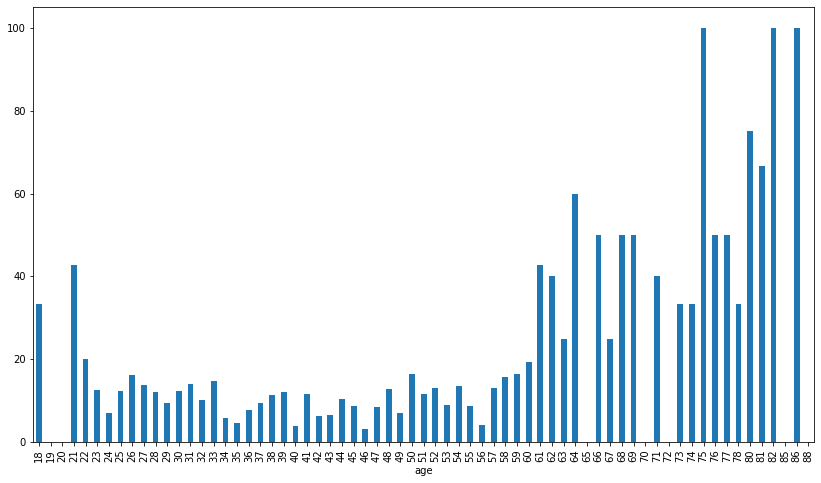

In [ ]:
yes_by_age.plot(kind='bar',figsize=(14,8))

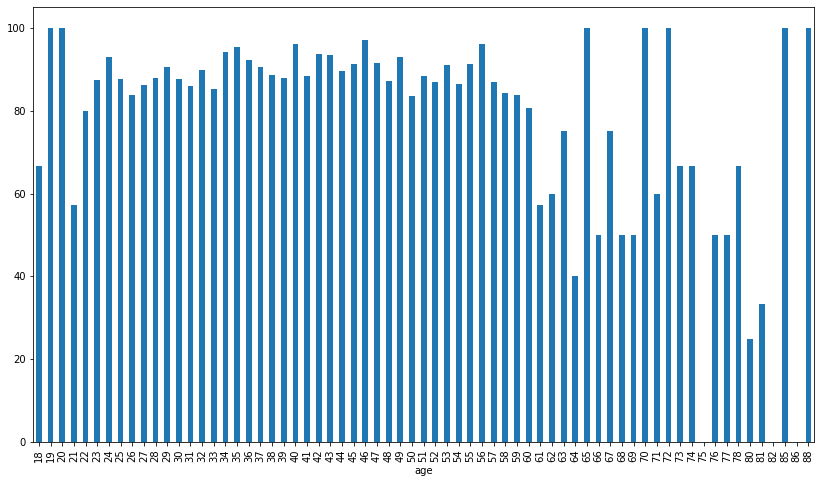

In [ ]:
no_by_age.plot(kind='bar',figsize=(14,8))

Si nota che i clienti dai 60 anni in su hanno maggiore classe di 'si' rispetto le altre età

In [ ]:
dataset.groupby(['age']).size().tail(30)

age
55    68
56    75
57    61
58    64
59    49
60    31
61     7
62     5
63     4
64     5
65     3
66     6
67     4
68     4
69     2
70     2
71     5
72     2
73     3
74     3
75     2
76     4
77     2
78     3
80     4
81     3
82     2
85     1
86     2
88     1
dtype: int64

Ma questo dato (si e no % per età) ci dice poco dato che il numero di persone dai 60 anni in su è di molto inferiore al resto delle età

In [ ]:
dataset['age'].value_counts().head(20)
#le maggiori 20 età con più entry nel dataset

32    216
31    191
30    177
34    174
35    172
33    170
36    168
38    150
41    147
29    139
37    137
39    133
42    112
43    108
28    108
47    107
45    104
40    103
46     99
44     97
Name: age, dtype: int64

#Parte 2: Trasformazione e Predizione

##Punto 1
Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi
dell’array numpy devono essere delle stesso data type numerico. E’ necessario pertanto
trasformare i dati del dataset per renderli utilizzabili con scikit.
Trasformare i valori categorici in valori numerici assegnando un valore specifico a ogni categoria
di valori. In particolare, assegnare il valore 0 al valore “no” dell’attributo “y” e 1 al valore
“yes”.
Eliminare eventuali attributi che per qualche ragione (Specificarla) si ritiene essere inutili per la
classificazione. Eliminare tutte le istanze per le quali c’è un attributo che assume valore
unknown. (punti 3)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   emp.var.rate    4119 non-null   float64
 9   cons.price.idx  4119 non-null   float64
 10  cons.conf.idx   4119 non-null   float64
 11  euribor3m       4119 non-null   float64
 12  nr.employed     4119 non-null   float64
 13  y               4119 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 450.6+ KB


In [ ]:
(dataset == 'unknown').sum()

id                  0
age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [ ]:
to_drop_rows  = dataset[(dataset == 'unknown').any(axis=1)]

dataset_dropped = dataset.drop(index = to_drop_rows.index)
(dataset_dropped == 'unknown').sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
categ = dataset_dropped.select_dtypes(include='object')
categ_col = categ.columns
print(categ_col)
categ.head()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'y'], dtype='object')


,job,marital,education,default,housing,loan,y
0,blue-collar,married,basic.9y,no,yes,no,no
1,services,single,high.school,no,no,no,no
2,services,married,high.school,no,yes,no,no
4,admin.,married,university.degree,no,yes,no,no
5,services,single,university.degree,no,no,no,no


In [ ]:
for col in categ_col:
  unique = categ[col].unique()
  categ.loc[:,col] = categ.loc[:,col].replace(unique, np.arange(len(unique)))
print(categ.head())
categ['y'].value_counts()

   job  marital  education  default  housing  loan  y
0    0        0          0        0        0     0  0
1    1        1          1        0        1     0  0
2    1        0          1        0        0     0  0
4    2        0          2        0        0     0  0
5    1        1          2        0        1     0  0


0    2720
1     370
Name: y, dtype: int64

In [ ]:
dataset_dropped.drop(columns = categ_col, inplace=True)
dataset_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 4118
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3090 non-null   int64  
 1   age             3090 non-null   int64  
 2   emp.var.rate    3090 non-null   float64
 3   cons.price.idx  3090 non-null   float64
 4   cons.conf.idx   3090 non-null   float64
 5   euribor3m       3090 non-null   float64
 6   nr.employed     3090 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 193.1 KB


In [ ]:
numeric = dataset_dropped.join(categ)
numeric.head()

,id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,y
0,1,30,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,0,0,0,0
1,2,39,1.1,93.994,-36.4,4.855,5191.0,1,1,1,0,1,0,0
2,3,25,1.4,94.465,-41.8,4.962,5228.1,1,0,1,0,0,0,0
4,5,47,-0.1,93.200,-42.0,4.191,5195.8,2,0,2,0,0,0,0
5,6,32,-1.1,94.199,-37.5,0.884,4963.6,1,1,2,0,1,0,0


In [ ]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3090 non-null   int64  
 1   age             3090 non-null   int64  
 2   emp.var.rate    3090 non-null   float64
 3   cons.price.idx  3090 non-null   float64
 4   cons.conf.idx   3090 non-null   float64
 5   euribor3m       3090 non-null   float64
 6   nr.employed     3090 non-null   float64
 7   job             3090 non-null   int64  
 8   marital         3090 non-null   int64  
 9   education       3090 non-null   int64  
 10  default         3090 non-null   int64  
 11  housing         3090 non-null   int64  
 12  loan            3090 non-null   int64  
 13  y               3090 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 442.1 KB


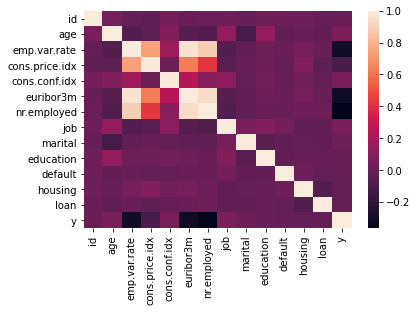

In [ ]:
sns.heatmap(numeric.corr())

In [ ]:
#c'e poca correlazione tra y e le feature:
#emp var rate - euribor3m - nr. employed

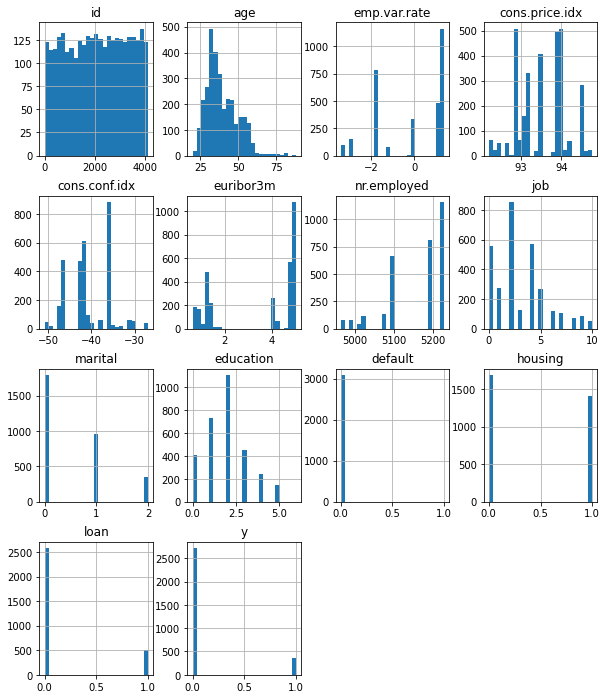

In [ ]:
numeric.iloc[:,:].hist(figsize=(10,12), bins=25)
plt.show()

In [ ]:
numeric_red = numeric.drop(columns=['emp.var.rate','euribor3m','nr.employed'])

#Elimino al colonna id per evitare overfitting
numeric_red.drop(columns='id', inplace=True)

numeric_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 4118
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3090 non-null   int64  
 1   cons.price.idx  3090 non-null   float64
 2   cons.conf.idx   3090 non-null   float64
 3   job             3090 non-null   int64  
 4   marital         3090 non-null   int64  
 5   education       3090 non-null   int64  
 6   default         3090 non-null   int64  
 7   housing         3090 non-null   int64  
 8   loan            3090 non-null   int64  
 9   y               3090 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 345.5 KB


In [ ]:
numeric_red.describe()

,age,cons.price.idx,cons.conf.idx,job,marital,education,default,housing,loan,y
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,93.532223,-40.618608,3.031068,0.533010,1.952104,0.000324,0.453722,0.164078,0.119741
std,10.184002,0.585886,4.746448,2.481594,0.688699,1.290064,0.017990,0.497934,0.370406,0.324711
min,20.000000,92.201000,-50.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,93.075000,-42.700000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,93.444000,-41.800000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,93.994000,-36.400000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000
max,88.000000,94.767000,-26.900000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000


##Punto 2

Si vuole predire la sottoscrizione di un deposito sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test” (punti 1).
Allenare il train e valutare l’accuracy ottenuta con il modello Decision Tree calcolata sia sul dataset train sia sul dataset test. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion matrix. (punti 4)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = numeric_red.drop(columns='y')
y = numeric_red['y']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=3/4 ,random_state=0, stratify=numeric_red['y'])

model = DecisionTreeClassifier()

model.fit(X_train,y_train)
predict = model.predict(X_test)

Confusion Matrix:
 [[609  71]
 [ 61  32]]


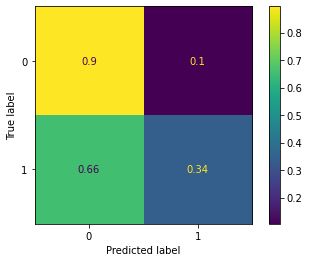


Accuracy: 0.8292367399741267 



In [ ]:
#matrice di confusione ed accuracy per test
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

In [ ]:

predict = model.predict(X_train)

Confusion Matrix:
 [[2040    0]
 [  16  261]]


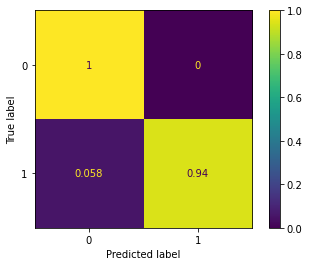


Accuracy: 0.9930945187742771 



In [ ]:
#matrice di confusione ed accuracy per train
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

La discrepanza elevata tra performance del modello su train e test indica la presenza di overfitting
Probabilmente alcune features sono identificative o il modello è troppo complesso per questa classificazione.
Proviamo a ridurre la profondità massima del decision Tree

Confusion Matrix:
 [[1849  191]
 [ 119  158]]


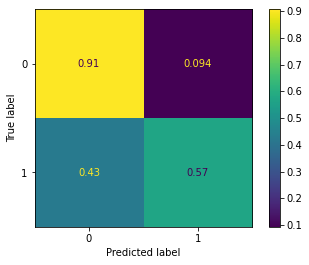


Accuracy: 0.8662063012516185 



In [ ]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=4)

model.fit(X_train,y_train)
predict = model.predict(X_train)
#matrice di confusione ed accuracy per train
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

Confusion Matrix:
 [[613  67]
 [ 41  52]]


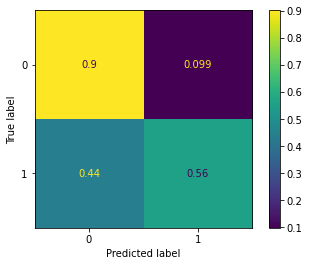


Accuracy: 0.8602846054333765 



In [ ]:
predict = model.predict(X_test)
#matrice di confusione ed accuracy per test
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

Abbiamo ridotto l'overfitting semplificando il modello, impostando una profondità massima di 4
Inoltre si è utilizzato un peso bilanciato per il numero di classi da predirre sbilanciate
In effeti la classe si viene predetta meglio



##Punto 3
Utilizzare un altro modello di predizione e confrontare i risultati ottenuti. (punti 2)

Confusion Matrix:
 [[2021   19]
 [ 230   47]]


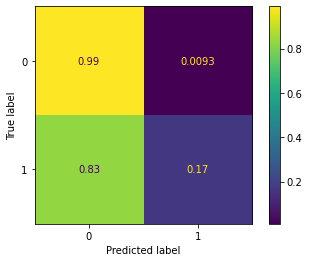


Accuracy: 0.8925334484246871 

Confusion Matrix:
 [[664  16]
 [ 87   6]]


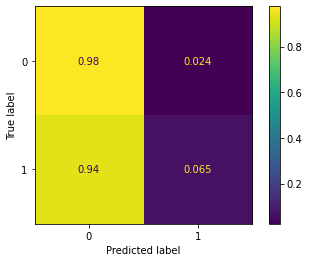


Accuracy: 0.8667529107373868 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train,y_train)
predict = model.predict(X_train)

#matrice di confusione ed accuracy per train
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

#matrice di confusione ed accuracy per test
predict = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

Il modello KNN ha peggiori performance sulla classe yes nonostante score di accuracy simili al Decision Tree
Tende anche ad overfitting sul train e per questo è utile aumentare il numero di vicini (n_neighbors=7)

##Punto 4
Confrontare l’accuratezza ottenuta nei punti 2 e 3 con accuratezza si ottiene con un 10 Fold
cross validation 

In [ ]:
X = numeric_red.drop(columns='y')
y = numeric_red['y']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=3/4 ,random_state=0, stratify=numeric_red['y'])

model_classic = DecisionTreeClassifier(class_weight='balanced', max_depth=4)

model_classic.fit(X_train,y_train)
predict = model_classic.predict(X_test)
print("\nAccuracy with normal training:", accuracy_score(y_test, predict),"\n")


Accuracy with normal training: 0.8602846054333765 



In [ ]:
model_cv = DecisionTreeClassifier(class_weight='balanced', max_depth=4)

cv_results = cross_val_score(model_cv, X, y, cv=10, scoring='accuracy')
print("Results:\n",cv_results,"\n\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

Results:
 [0.83495146 0.80582524 0.82524272 0.78964401 0.8381877  0.81877023
 0.82200647 0.84466019 0.8381877  0.81229773] 

Mean Accuracy: 0.8229773462783172 
Accuracy STD:  0.0161844656958576


L'accuracy ottenuta con una 10 fold cross validation è minore
Ma probabilmente la robustezza a variazioni del dataset di test è maggiore

E’ più affidabile la valutazione fatta con la cross validation o quella fatta con una suddivisione
arbitraria del dataset in due parti, training set e test set? Per quale motivo?

##Punto 5
Creare un nuovo dataset “numeric” che contenga esclusivamente i valori numerici del dataset
di partenza. Valutare l’accuratezza che si ottiene con questo dataset utilizzando i modelli
proposti nei punti 2 e 3. (punti 2).

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   emp.var.rate    4119 non-null   float64
 9   cons.price.idx  4119 non-null   float64
 10  cons.conf.idx   4119 non-null   float64
 11  euribor3m       4119 non-null   float64
 12  nr.employed     4119 non-null   float64
 13  y               4119 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 450.6+ KB


In [106]:
numeric = dataset._get_numeric_data()
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   emp.var.rate    4119 non-null   float64
 3   cons.price.idx  4119 non-null   float64
 4   cons.conf.idx   4119 non-null   float64
 5   euribor3m       4119 non-null   float64
 6   nr.employed     4119 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 225.4 KB


In [107]:
numeric.drop(columns='id', inplace=True)

In [108]:
Y = dataset['y']
Y = Y.replace(['yes', 'no'],[1,0])
Y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [111]:
numeric = numeric.join([Y])
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   emp.var.rate    4119 non-null   float64
 2   cons.price.idx  4119 non-null   float64
 3   cons.conf.idx   4119 non-null   float64
 4   euribor3m       4119 non-null   float64
 5   nr.employed     4119 non-null   float64
 6   y               4119 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 225.4 KB


In [112]:
#modello allenato sul dataset nei punti 2 e 3
X = numeric_red.drop(columns='y')
y = numeric_red['y']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=3/4 ,random_state=0, stratify=numeric_red['y'])

model_classic = DecisionTreeClassifier(class_weight='balanced', max_depth=4)

model_classic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Train Score
Confusion Matrix train:
 [[2450  301]
 [ 135  203]]


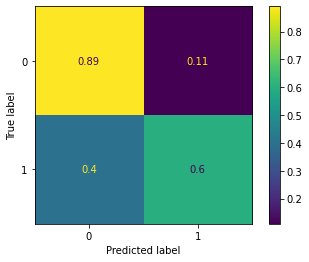


Accuracy train: 0.8588539980576239 

Test Score
Confusion Matrix test:
 [[808 109]
 [ 54  59]]


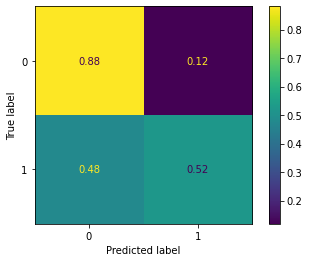


Accuracy test: 0.841747572815534 



In [121]:
randomizer = np.random.rand(len(numeric))

X_num = numeric.drop(columns='y')
y_num = numeric['y']

X_train, X_test, y_train, y_test = train_test_split(X_num, y_num,train_size=3/4 ,random_state=0, stratify=numeric['y'])

model = DecisionTreeClassifier(class_weight='balanced', max_depth=4)

model.fit(X_train,y_train)
predict = model.predict(X_train)

#matrice di confusione ed accuracy per train
print("Train Score")
print("Confusion Matrix train:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy train:", accuracy_score(y_train, predict),"\n")

#matrice di confusione ed accuracy per test
print("Test Score")
predict = model.predict(X_test)
print("Confusion Matrix test:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy test:", accuracy_score(y_test, predict),"\n")

Nel modello allenato con il dataset numeric_red avevamo
Accuracy train: 0.8662063012516185 
Accuracy test : 0.8602846054333765

Con il dataset numerico ridotto dall'originale (senza trasformazione dei valori categorici), i risultati sono leggermente inferiori
Non sembra esserci overfitting dato che gli score tra train e test sono molto simili

##Punto 6
Aggiungere al dataset numeric gli attributi categorici in questo modo: per ogni attributo
categorico costruire un numero di attributi booleani pari ai possibili valori della categoria. Ogni
attributo rappresenta una categoria L’attributo booleano assume il valore 1 per le istanze del
dataset originale che hanno il valore della categoria che l’attributo rappresenta. Valutare
l’accuratezza che si ottiene con questo dataset utilizzando i modelli proposti nei punti 2 e 3.
(punti 3).

##Punto 7
Utilizzare un algoritmo di regressione da applicarsi al dataset del punto 1 per predire “y”.
Arrotondare i valori ottenuti a 0 e a 1. Confrontare i risultati ottenuti con quelli ottenuti in
precedenza (punti 4).